In [218]:
import tensorflow
print(tensorflow.__version__)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import RandomSearch
from tensorflow.keras import optimizers

2.11.0


In [219]:
# Importing the librarise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
dataset = pd.read_csv("/content/aps_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [221]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [222]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
av_000    0
ax_000    0
ay_000    0
ay_001    0
ay_002    0
ay_003    0
ay_004    0
ay_005    0
ay_006    0
ay_007    0
ay_008    0
ay_009    0
az_000    0
az_001    0
az_002    0
az_003    0
az_004    0
az_005    0
az_006    0
az_007    0
az_008    0
az_009    0
ba_000    0
ba_001    0
ba_002    0
ba_003    0
ba_004    0
ba_005    0
ba_006    0
ba_007    0
ba_008    0
ba_009    0
bb_000    0
bc_000    0
bd_000    0
be_000    0
bf_000    0
bg_000    0
bh_000    0
bi_000    0
bj_000    0
bk_000    0
bl_000    0
bm_000    0
bn_000    0
bo_000    0
bp_000    0
bq_000    0
br_000    0
bs_000    0
bt_000    0
bu_000    0
bv_0

In [223]:
dataset = dataset.replace("na", np.nan)

In [224]:
# pd.options.display.max_rows = 1000

In [225]:
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [226]:
dataset.isnull().sum().sum()

71649

In [227]:
pd.DataFrame(dataset.isnull().sum().sort_values(ascending = False)).rename(columns = {0:"Null Value Count"})

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [228]:
### Filling null values in feature with median of that feature
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
    dataset[feature]=dataset[feature].fillna(dataset[feature].median())

In [229]:
[feature for feature in dataset.columns if feature not in ['class']]

['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

In [230]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
av_000    0
ax_000    0
ay_000    0
ay_001    0
ay_002    0
ay_003    0
ay_004    0
ay_005    0
ay_006    0
ay_007    0
ay_008    0
ay_009    0
az_000    0
az_001    0
az_002    0
az_003    0
az_004    0
az_005    0
az_006    0
az_007    0
az_008    0
az_009    0
ba_000    0
ba_001    0
ba_002    0
ba_003    0
ba_004    0
ba_005    0
ba_006    0
ba_007    0
ba_008    0
ba_009    0
bb_000    0
bc_000    0
bd_000    0
be_000    0
bf_000    0
bg_000    0
bh_000    0
bi_000    0
bj_000    0
bk_000    0
bl_000    0
bm_000    0
bn_000    0
bo_000    0
bp_000    0
bq_000    0
br_000    0
bs_000    0
bt_000    0
bu_000    0
bv_0

In [231]:
pd.DataFrame(dataset.isnull().sum().sort_values(ascending = False)).rename(columns = {0:"Null Value Count"})

,Null Value Count
class,0
cs_003,0
cn_009,0
co_000,0
cp_000,0
cq_000,0
cr_000,0
cs_000,0
cs_001,0
cs_002,0


In [232]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [233]:
X = dataset.drop("class", axis = 1)

In [234]:
y = dataset["class"]

In [235]:
X.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [236]:
y = pd.get_dummies(y,drop_first= True)

In [237]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [238]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [239]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [240]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [241]:
classifier = Sequential()

In [242]:
classifier.add(Dense(units = 10, kernel_initializer ='he_uniform',activation = 'relu', input_dim= 170))
classifier.add(Dense(units = 10, kernel_initializer ='he_uniform',activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer ='glorot_uniform',activation = 'sigmoid'))

In [243]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy', metrics =['accuracy'])

In [244]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1710      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [245]:
model_history = classifier.fit(X_train, y_train, batch_size= 10, epochs = 30,validation_split = 0.25)

Epoch 1/30
300/300 [==============================] - 3s 6ms/step - loss: 0.1994 - accuracy: 0.9447 - val_loss: 0.0868 - val_accuracy: 0.9790
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.0735 - val_accuracy: 0.9860
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0595 - val_accuracy: 0.9860
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9910 - val_loss: 0.0637 - val_accuracy: 0.9870
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0560 - val_accuracy: 0.9880
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0688 - val_accuracy: 0.9880
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.0752 - val_accuracy: 0.9880
Epoch 

In [246]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [247]:
model_history.history["accuracy"]

[0.9446666836738586,
 0.9836666584014893,
 0.9890000224113464,
 0.9909999966621399,
 0.9926666617393494,
 0.9946666955947876,
 0.9953333139419556,
 0.9946666955947876,
 0.9959999918937683,
 0.9963333606719971,
 0.9953333139419556,
 0.9959999918937683,
 0.9953333139419556,
 0.996999979019165,
 0.9980000257492065,
 0.9963333606719971,
 0.996999979019165,
 0.996999979019165,
 0.9976666569709778,
 0.9953333139419556,
 0.9983333349227905,
 0.9986666440963745,
 0.9990000128746033,
 0.9976666569709778,
 0.9986666440963745,
 0.9956666827201843,
 0.9983333349227905,
 0.9976666569709778,
 0.9993333220481873,
 0.9993333220481873]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


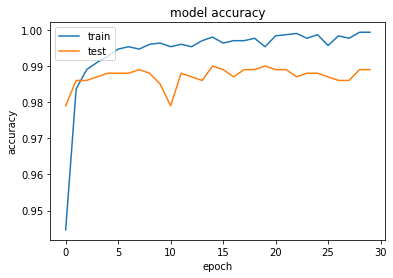

In [248]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


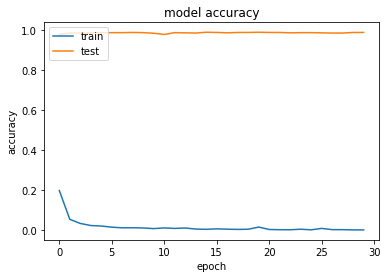

In [249]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [250]:
y_pred = classifier.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [251]:
y_pred = y_pred>0.05

In [252]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[968,  18],
       [  5,   9]])

In [265]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [267]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_02_20_05_29_34_.h5


In [253]:
#hyperparameter tuning with keras tuner

!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
from kerastuner.tuners import RandomSearch

In [255]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units = 32, kernel_initializer ='he_uniform',activation = 'relu', input_dim= 170))
  model.add(Dense(units = 32, kernel_initializer ='he_uniform',activation = 'relu'))
  
  model.add(Dense(1, activation = 'sigmoid'))
  optimizer = hp.Choice("optimizer",values = ["adam","sgd", "rmsprop", "adadelta"])
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy'])
  return model

In [256]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory = 'project', project_name = 'aps_fault')

In [257]:
tuner.search(X_train, y_train, validation_data = (X_test,y_test),epochs = 5)

In [258]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [259]:
my_model = tuner.get_best_models(num_models=1)[0]

In [260]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [261]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [262]:
tuner_second = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory = 'project1', project_name = 'aps_fault')
tuner_second.search(X_train, y_train, validation_data = (X_test,y_test),epochs = 5)

In [263]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 11,
 'units_0': 32,
 'units_1': 512,
 'learning_rate': 0.0001,
 'units_2': 224,
 'units_3': 224,
 'units_4': 288,
 'units_5': 448,
 'units_6': 96,
 'units_7': 192,
 'units_8': 288,
 'units_9': 288,
 'units_10': 416}

In [264]:
my_model2 = tuner_second.get_best_hyperparameters()[0].values